# NBA Player Exploratory Data Analysis

## Loading Packages

In [1]:
import pandas as pd
import pyodbc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Data

In [2]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-JELE8O2;'
                      'Database=NBA All Seasons;'
                      'Trusted_Connection=yes;')

df = pd.read_sql("SELECT * FROM dbo.all_seasons$", conn)

c:\users\nevistic\appdata\local\programs\python\python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


## Explore Dataset

In [3]:
print(df.shape)
print(df.size)

(11700, 22)
257400


As we can ses data contains 11 700 rows and 22 columns.

In data set there are 257 400 data points.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   F1                 11700 non-null  float64
 1   player_name        11700 non-null  object 
 2   team_abbreviation  11700 non-null  object 
 3   age                11700 non-null  float64
 4   player_height      11700 non-null  float64
 5   player_weight      11700 non-null  float64
 6   college            11700 non-null  object 
 7   country            11700 non-null  object 
 8   draft_year         9643 non-null   float64
 9   draft_round        9606 non-null   float64
 10  draft_number       9604 non-null   float64
 11  gp                 11700 non-null  float64
 12  pts                11700 non-null  float64
 13  reb                11700 non-null  float64
 14  ast                11700 non-null  float64
 15  net_rating         11700 non-null  float64
 16  oreb_pct           117

From data set info we can ses that columns draft_year, draft_round and draft_number have null values.

In [5]:
df.isnull().sum()

F1                      0
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college                 0
country                 0
draft_year           2057
draft_round          2094
draft_number         2096
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64

In [6]:
df.head(10)

,F1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,1684.0,Ben Davis,PHX,27.0,205.74,111.130040,Arizona,USA,1996.0,2.0,...,0.8,1.8,0.4,-30.9,0.125,0.375,0.188,0.333,0.167,1999-00
1,1685.0,Ben Wallace,ORL,25.0,205.74,108.862080,Virginia Union,USA,NaN,NaN,...,4.8,8.2,0.8,1.9,0.116,0.246,0.097,0.508,0.047,1999-00
2,1686.0,Anthony Johnson,ORL,25.0,190.50,86.182480,College of Charleston,USA,1997.0,2.0,...,2.8,0.9,1.3,-3.5,0.036,0.051,0.143,0.425,0.167,1999-00
3,1687.0,Benoit Benjamin,CLE,35.0,213.36,113.398000,Creighton,USA,1985.0,1.0,...,0.7,0.3,0.0,46.4,0.000,0.100,0.189,0.333,0.000,1999-00
4,1688.0,Anthony Carter,MIA,25.0,185.42,86.182480,Hawaii,USA,NaN,NaN,...,6.3,2.5,4.8,1.8,0.032,0.091,0.185,0.442,0.321,1999-00
5,1689.0,Antawn Jamison,GSW,24.0,205.74,101.151016,North Carolina,USA,1998.0,1.0,...,19.6,8.3,2.1,-8.3,0.108,0.131,0.257,0.496,0.102,1999-00
6,1690.0,Chucky Atkins,ORL,25.0,180.34,72.574720,South Florida,USA,NaN,NaN,...,9.5,1.5,3.7,-1.2,0.014,0.072,0.246,0.489,0.319,1999-00
7,1691.0,A.C. Green,LAL,36.0,205.74,102.058200,Oregon State,USA,1985.0,1.0,...,5.0,5.9,1.0,8.1,0.089,0.179,0.111,0.482,0.058,1999-00
8,1692.0,Aaron McKie,PHI,27.0,195.58,94.800728,Temple,USA,1994.0,1.0,...,8.0,3.0,2.9,0.1,0.026,0.115,0.172,0.497,0.202,1999-00
9,1693.0,Aaron Williams,WAS,28.0,205.74,102.058200,Xavier,USA,NaN,NaN,...,7.6,5.0,0.7,2.2,0.122,0.186,0.180,0.572,0.062,1999-00


In [7]:
df.columns

Index(['F1', 'player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

We have 22 columns in dataset.

F1 - index number in database 

player_name - Name of the player

team_abbreviation - Abbreviated name of the team the player played for (at the end of the season)

age - Age of the player

player_height - Height of the player (in centimeters)

player_weight - Weight of the player (in kilograms)

college - Name of the college the player attended 

country - Name of the country the player was born in (not necessarily the nationality)

draft_year - The year the player was drafted

draft_round - The draft round the player was picked

draft_number - The draft number the player was picked

gp - Games played

pts - Points per game

reb - Rebounds per game

ast - Asissts per game

net_rating - How much better or worse the team is when a specific player is on the court

oreb_pct - Offensive rebounds %

dreb_pct - Deffensive rebounts %

usg_pct - Is an estimate of team plays which a player uses while on the court

ts_pct - The true shooting percentage is the shooting percentage adjusted for three-pointers and free throws, and measures a player's efficiency at shooting the ball. True shooting percentage equals half the points scored divided by the sum of the field goals attempted and 0.475 times the free throws attempted.

ast_pct - Asissts %

season - Player statistic for that season

In [8]:
df.describe()

,F1,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11700.000000,11700.000000,11700.000000,11700.000000,9643.000000,9606.000000,9604.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000
mean,5849.500000,27.131966,200.728501,100.526791,2002.945245,1.302623,21.783007,51.717179,8.169299,3.564957,1.811179,-2.166410,0.054981,0.141534,0.185380,0.510402,0.131228
std,3377.643409,4.340006,9.169827,12.526481,8.482550,0.508263,16.062968,24.985236,5.956115,2.487498,1.792117,12.076914,0.043595,0.062793,0.052957,0.098306,0.094244
min,0.000000,18.000000,160.020000,60.327736,1963.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2924.750000,24.000000,193.040000,90.718400,1997.000000,1.000000,9.000000,32.000000,3.600000,1.800000,0.600000,-6.300000,0.021000,0.096000,0.150000,0.479000,0.065000
50%,5849.500000,26.000000,200.660000,99.790240,2003.000000,1.000000,19.000000,58.000000,6.700000,3.000000,1.200000,-1.300000,0.042000,0.132000,0.182000,0.523000,0.103000
75%,8774.250000,30.000000,208.280000,108.862080,2009.000000,2.000000,33.000000,74.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.218000,0.559000,0.178000
max,11699.000000,44.000000,231.140000,163.293120,2020.000000,8.000000,165.000000,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


From the statistics summary above, we can see that all numeric columns have okey data, no unrealistic data can be found.

In [9]:
print(np.sort(df["team_abbreviation"].unique()))
print(len(df["team_abbreviation"].unique()))

['ATL' 'BKN' 'BOS' 'CHA' 'CHH' 'CHI' 'CLE' 'DAL' 'DEN' 'DET' 'GSW' 'HOU'
 'IND' 'LAC' 'LAL' 'MEM' 'MIA' 'MIL' 'MIN' 'NJN' 'NOH' 'NOK' 'NOP' 'NYK'
 'OKC' 'ORL' 'PHI' 'PHX' 'POR' 'SAC' 'SAS' 'SEA' 'TOR' 'UTA' 'VAN' 'WAS']
36


BKN - Brooklyn Nets == NJN - New Jersey Nets

CHA and CHH == The Charlotte Hornets

NOH New Orleans Hornets, NOK New Orleans/Oklahoma City Hornets == NOP New Orleans Pelicans

SEA - Seattle SuperSonics == OKC - Oklahoma City Thunder

VAN - Vancouver Grizzlies == MEM Memphis Grizzlies

In the data, we have the same clubs with different names, because in the past they were called differently. Teams usually change their name when they change city or owner.

In [10]:
np.sort(df["country"].unique())

array(['Angola', 'Argentina', 'Australia', 'Austria', 'Bahamas', 'Belize',
       'Bosnia', 'Bosnia & Herzegovina', 'Bosnia and Herzegovina',
       'Brazil', 'Cabo Verde', 'Cameroon', 'Canada', 'China', 'Congo',
       'Croatia', 'Czech Republic', 'DRC',
       'Democratic Republic of the Congo', 'Dominican Republic', 'Egypt',
       'England', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany',
       'Ghana', 'Great Britain', 'Greece', 'Guinea', 'Haiti', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Latvia',
       'Lithuania', 'Macedonia', 'Mali', 'Mexico', 'Montenegro',
       'Netherlands', 'New Zealand', 'Nigeria', 'Panama', 'Poland',
       'Puerto Rico', 'Republic of the Congo', 'Russia', 'Saint Lucia',
       'Scotland', 'Senegal', 'Serbia', 'Serbia and Montenegro',
       'Slovenia', 'South Korea', 'South Sudan', 'Spain',
       'St. Vincent & Grenadines', 'Sudan', 'Sudan (UK)', 'Sweden',
       'Switzerland', 'Tanzania', 'Trinidad and Tobago', 'Tunisia',

Column country represents name of the country the player was born in not necessarily the nationality.

Changes need to be made with Bosnia and Herzegovina, Bosnia, Bosnia & Herzegovina, DRC, Democratic Republic of the Congo, Republic of the Congo, Sudan (UK) and South Sudan.

In [12]:
print(np.sort(df["draft_year"].unique()))
print(np.sort(df["draft_round"].unique()))
print(np.sort(df["draft_number"].unique()))

[1963. 1976. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987.
 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999.
 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020.   nan]
[ 0.  1.  2.  3.  4.  6.  7.  8. nan]
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  63.  66.  69.  75.  78.  79.  82.  87. 120.
 124. 127. 139. 160. 165.  nan]


In draft_year, draft_round,draft_number Nan and 0 values are undrafted players.

Players that enter draft and are not chosen by any team become undrafted players and then they go into training camp to attempt to be picked up there by NBA team.

In [13]:
print(np.sort(df["season"].unique()))

['1996-97' '1997-98' '1998-99' '1999-00' '2000-01' '2001-02' '2002-03'
 '2003-04' '2004-05' '2005-06' '2006-07' '2007-08' '2008-09' '2009-10'
 '2010-11' '2011-12' '2012-13' '2013-14' '2014-15' '2015-16' '2016-17'
 '2017-18' '2018-19' '2019-20' '2020-21']


## Data Cleaning and Data Preprocessing

In [14]:
df = df.drop(["F1", "college", "oreb_pct", "dreb_pct", 'net_rating', 'usg_pct', 'ts_pct', 'ast_pct'], axis = 1)
df

,player_name,team_abbreviation,age,player_height,player_weight,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,season
0,Ben Davis,PHX,27.0,205.74,111.130040,USA,1996.0,2.0,43.0,5.0,0.8,1.8,0.4,1999-00
1,Ben Wallace,ORL,25.0,205.74,108.862080,USA,NaN,NaN,NaN,81.0,4.8,8.2,0.8,1999-00
2,Anthony Johnson,ORL,25.0,190.50,86.182480,USA,1997.0,2.0,39.0,56.0,2.8,0.9,1.3,1999-00
3,Benoit Benjamin,CLE,35.0,213.36,113.398000,USA,1985.0,1.0,3.0,3.0,0.7,0.3,0.0,1999-00
4,Anthony Carter,MIA,25.0,185.42,86.182480,USA,NaN,NaN,NaN,79.0,6.3,2.5,4.8,1999-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,Arvydas Sabonis,POR,35.0,220.98,132.448864,Lithuania,1986.0,1.0,24.0,66.0,11.8,7.8,1.8,1999-00
11696,Austin Croshere,IND,25.0,205.74,106.594120,USA,1997.0,1.0,12.0,81.0,10.3,6.4,1.1,1999-00
11697,Avery Johnson,SAS,35.0,180.34,81.646560,USA,NaN,NaN,NaN,82.0,11.2,1.9,6.0,1999-00
11698,B.J. Armstrong,CHI,32.0,187.96,83.914520,USA,1989.0,1.0,18.0,27.0,7.4,1.7,2.9,1999-00


I had deleted columns that are not gonna be used (can't go deep with level of details) or are not useful for this analysis. 

In [15]:
df['team_abbreviation'] = df['team_abbreviation'].replace(["NJN", "CHA", "SEA", "VAN", "NOK","NOH"],["BKN", "CHH", "OKC", "MEM", "NOP", "NOP"])
print(np.sort(df["team_abbreviation"].unique()))

['ATL' 'BKN' 'BOS' 'CHH' 'CHI' 'CLE' 'DAL' 'DEN' 'DET' 'GSW' 'HOU' 'IND'
 'LAC' 'LAL' 'MEM' 'MIA' 'MIL' 'MIN' 'NOP' 'NYK' 'OKC' 'ORL' 'PHI' 'PHX'
 'POR' 'SAC' 'SAS' 'TOR' 'UTA' 'WAS']


There were NBA teams with different names in the data, but they represented the same team. Now it is fixed.

In [16]:
df['country'] = df['country'].replace(["Bosnia", "Bosnia & Herzegovina", "DRC", "Republic of the Congo", "Sudan (UK)"],["Bosnia and Herzegovina", "Bosnia and Herzegovina", "Democratic Republic of the Congo", "Democratic Republic of the Congo", "South Sudan"])
print(np.sort(df["country"].unique()))

['Angola' 'Argentina' 'Australia' 'Austria' 'Bahamas' 'Belize'
 'Bosnia and Herzegovina' 'Brazil' 'Cabo Verde' 'Cameroon' 'Canada'
 'China' 'Congo' 'Croatia' 'Czech Republic'
 'Democratic Republic of the Congo' 'Dominican Republic' 'Egypt' 'England'
 'Finland' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Great Britain'
 'Greece' 'Guinea' 'Haiti' 'Iran' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Latvia' 'Lithuania' 'Macedonia' 'Mali' 'Mexico' 'Montenegro'
 'Netherlands' 'New Zealand' 'Nigeria' 'Panama' 'Poland' 'Puerto Rico'
 'Russia' 'Saint Lucia' 'Scotland' 'Senegal' 'Serbia'
 'Serbia and Montenegro' 'Slovenia' 'South Korea' 'South Sudan' 'Spain'
 'St. Vincent & Grenadines' 'Sudan' 'Sweden' 'Switzerland' 'Tanzania'
 'Trinidad and Tobago' 'Tunisia' 'Turkey' 'U.S. Virgin Islands'
 'US Virgin Islands' 'USA' 'USSR' 'Ukraine' 'United Kingdom' 'Uruguay'
 'Venezuela' 'Yugoslavia']


In [17]:
df['draft_round'] = df['draft_round'].fillna(0)
df['draft_number'] = df['draft_number'].fillna(0)
df['draft_year'] = df['draft_year'].fillna(0)

Filling in nan values (undrafted players).

In [18]:
df = df.sort_values(by='season').reset_index(drop=True)
df

,player_name,team_abbreviation,age,player_height,player_weight,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,season
0,Jayson Williams,BKN,29.0,205.74,108.862080,USA,1990.0,1.0,21.0,41.0,13.4,13.5,1.2,1996-97
1,Jerome Allen,DEN,24.0,193.04,83.460928,USA,1995.0,2.0,49.0,76.0,3.0,1.3,2.0,1996-97
2,Aaron McKie,DET,24.0,195.58,94.800728,USA,1994.0,1.0,17.0,83.0,5.2,2.7,1.9,1996-97
3,Aaron Williams,MEM,25.0,205.74,102.058200,USA,0.0,0.0,0.0,33.0,6.2,4.3,0.5,1996-97
4,Acie Earl,MIL,27.0,210.82,108.862080,USA,1993.0,1.0,19.0,47.0,4.0,2.0,0.4,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,Austin Rivers,DEN,28.0,193.04,90.718400,USA,2012.0,1.0,10.0,36.0,7.9,2.3,2.3,2020-21
11696,Avery Bradley,HOU,30.0,190.50,81.646560,USA,2010.0,1.0,19.0,27.0,6.4,2.1,1.7,2020-21
11697,Axel Toupane,MIL,28.0,200.66,95.254320,France,0.0,0.0,0.0,8.0,1.8,0.8,0.5,2020-21
11698,Alfonzo McKinnie,LAL,28.0,200.66,97.522280,USA,0.0,0.0,0.0,39.0,3.1,1.4,0.2,2020-21


# NBA analysis through the years ( season 1996/97 - 2020/21)

## Players age and dimenzions through the years

<function matplotlib.pyplot.show(close=None, block=None)>

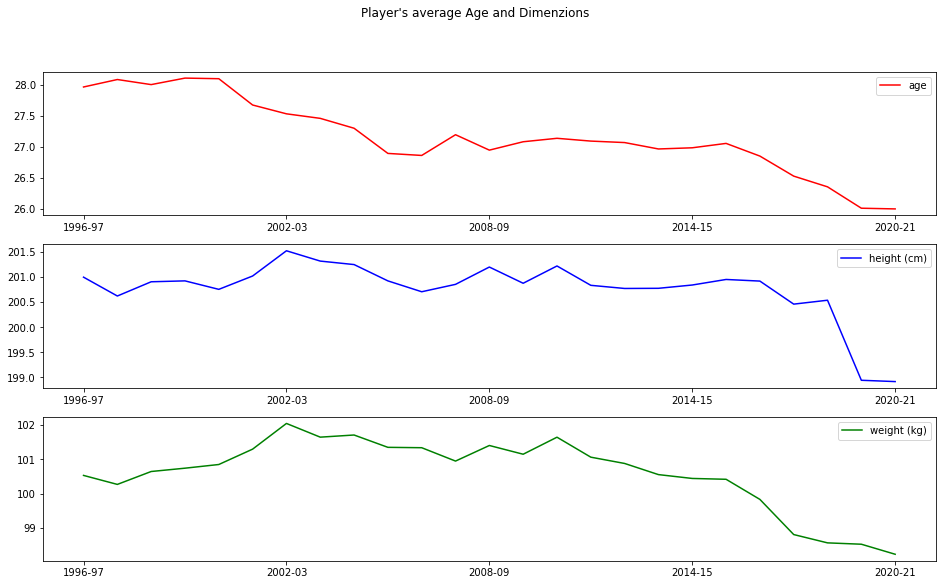

In [20]:
age = pd.DataFrame(df.groupby(['season'])["age"].mean())
height = pd.DataFrame(df.groupby(['season'])["player_height"].mean())
weight = pd.DataFrame(df.groupby(['season'])["player_weight"].mean())

ticks = np.sort(df["season"].unique())
plt.rcParams["figure.figsize"] = [16,9]

plt.subplot(3, 1, 1)
plt.plot(age, c = "r", label = "age")
plt.legend()
plt.xticks(ticks[::6])

plt.subplot(3, 1, 2)
plt.plot(height, c = "b", label = "height (cm)")
plt.legend()
plt.xticks(ticks[::6])

plt.subplot(3, 1, 3)
plt.plot(weight, c = "g", label = "weight (kg)")
plt.legend()
plt.xticks(ticks[::6])

plt.suptitle("Player's average Age and Dimenzions")
plt.legend()
plt.show

As we can see from the graphs, players age went down for 2 years, probably because teams are looking for young prospects that can bring a brighter future to the team.

Also, players height and weight gone down too, because game of basketball is always evolving, and right now teams are playing more with the shorter and lighter players so they could get more stretch on the floor or use them in different positions.

## Average points, assists and rebounds per game

<function matplotlib.pyplot.show(close=None, block=None)>

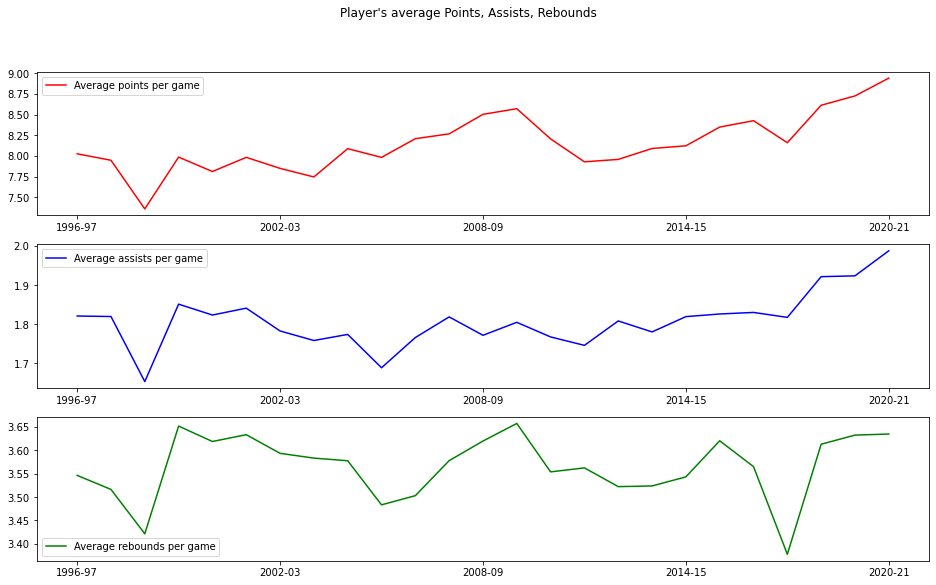

In [21]:
pts = pd.DataFrame(df.groupby(['season'])["pts"].mean())
assist = pd.DataFrame(df.groupby(['season'])["ast"].mean())
reb	 = pd.DataFrame(df.groupby(['season'])["reb"].mean())

ticks = np.sort(df["season"].unique())
plt.rcParams["figure.figsize"] = [16,9]

plt.subplot(3, 1, 1)
plt.plot(pts, c = "r", label = "Average points per game")
plt.legend()
plt.xticks(ticks[::6])

plt.subplot(3, 1, 2)
plt.plot(assist,c = "b", label = "Average assists per game")
plt.legend()
plt.xticks(ticks[::6])

plt.subplot(3, 1, 3)
plt.plot(reb, c = "g", label = "Average rebounds per game")
plt.legend()
plt.xticks(ticks[::6])

plt.suptitle("Player's average Points, Assists, Rebounds")
plt.legend()
plt.show

It seems like most players nowadays have a higher point and asissts-per-game average than players back in 1996. Rebounds are preety the same in the span of 25 years.

Today players take more 3 point shots because game evolved, maybe that is the reasone for more points and assists per game gone up.

## Position wise analysis

In [22]:
df["position"]= None
df.loc[df['player_height'] >= 210, 'position'] = 'Center'
df.loc[(df['player_height'] >= 196) & (df['player_height'] < 210), 'position'] = 'Forward'
df.loc[df['player_height'] < 196, 'position'] = 'Guard'

<function matplotlib.pyplot.show(close=None, block=None)>

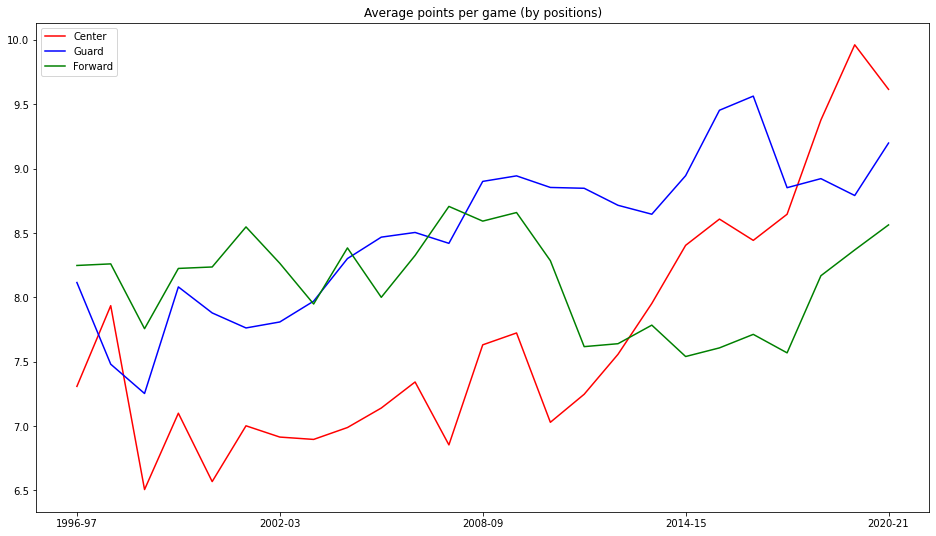

In [23]:
ticks = np.sort(df["season"].unique())
plt.rcParams["figure.figsize"] = [16,9]

center_df = df[df["position"] == 'Center']

pts = pd.DataFrame(center_df.groupby(['season'])["pts"].mean())
plt.plot(pts, label = "Center", c = "r")


guard_df = df[df["position"] == 'Guard']
pts = pd.DataFrame(guard_df.groupby(['season'])["pts"].mean())
plt.plot(pts,label = "Guard", c = "b")



Forward_df = df[df["position"] == 'Forward']
pts = pd.DataFrame(Forward_df.groupby(['season'])["pts"].mean())
plt.plot(pts, label = "Forward", c = "g")
plt.legend()

plt.xticks(ticks[::6])
plt.title("Average points per game (by positions)")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

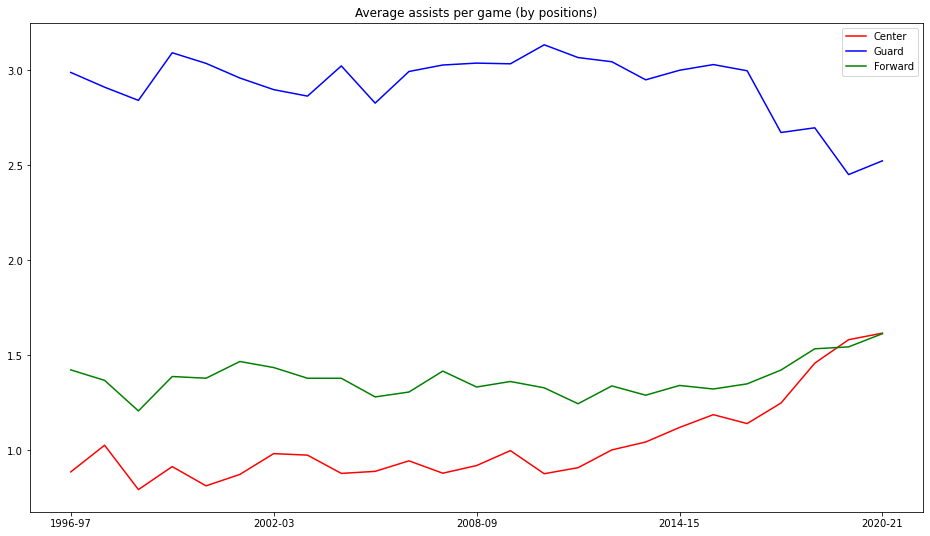

In [24]:
ticks = np.sort(df["season"].unique())
plt.rcParams["figure.figsize"] = [16,9]

center_df = df[df["position"] == 'Center']

pts = pd.DataFrame(center_df.groupby(['season'])["ast"].mean())
plt.plot(pts, label = "Center", c = "r")


guard_df = df[df["position"] == 'Guard']
pts = pd.DataFrame(guard_df.groupby(['season'])["ast"].mean())
plt.plot(pts,label = "Guard", c = "b")



Forward_df = df[df["position"] == 'Forward']
pts = pd.DataFrame(Forward_df.groupby(['season'])["ast"].mean())
plt.plot(pts, label = "Forward", c = "g")
plt.legend()

plt.xticks(ticks[::6])
plt.title("Average assists per game (by positions)")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

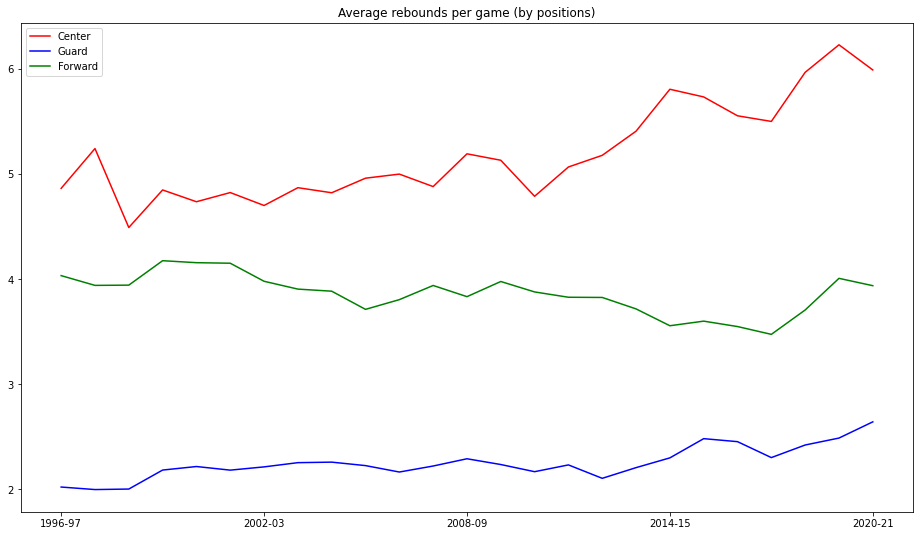

In [25]:
ticks = np.sort(df["season"].unique())
plt.rcParams["figure.figsize"] = [16,9]

center_df = df[df["position"] == 'Center']

pts = pd.DataFrame(center_df.groupby(['season'])["reb"].mean())
plt.plot(pts, label = "Center", c = "r")


guard_df = df[df["position"] == 'Guard']
pts = pd.DataFrame(guard_df.groupby(['season'])["reb"].mean())
plt.plot(pts,label = "Guard", c = "b")



Forward_df = df[df["position"] == 'Forward']
pts = pd.DataFrame(Forward_df.groupby(['season'])["reb"].mean())
plt.plot(pts, label = "Forward", c = "g")
plt.legend()

plt.xticks(ticks[::6])
plt.title("Average rebounds per game (by positions)")
plt.legend()
plt.show

From all 3 graphs above, we can see that centers improved most, they become more skillful as we can see improvements in points and assists per game. On the third graph, we can see that the guards and forwards are improving in rebounding.

## Analysis of which countries the players come from

<function matplotlib.pyplot.show(close=None, block=None)>

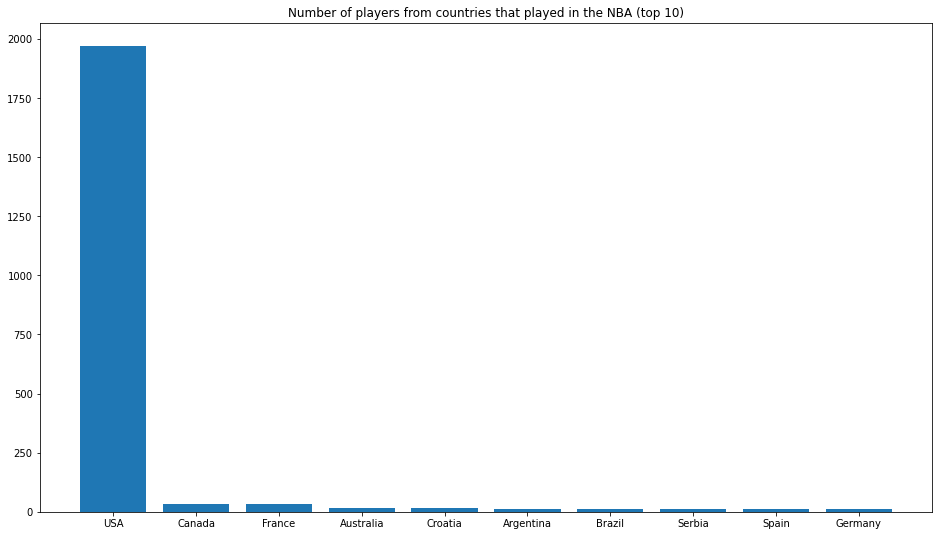

In [27]:
plt.rcParams["figure.figsize"] = [16,9]
players_country = df[['player_name', 'country']]
players_country = players_country.drop_duplicates(subset=['player_name'])

country = pd.DataFrame(players_country.groupby(['country'])["player_name"].count())
country = country.sort_values(by ="player_name",ascending=False)
plt.bar(country.index[0:10],country["player_name"].head(10))
plt.title("Number of players from countries that played in the NBA (top 10)")
plt.show

As the NBA is an American basketball league, it was to be expected that most of the players would come from the USA. In the further analysis, the USA will be singled out from the data.

<function matplotlib.pyplot.show(close=None, block=None)>

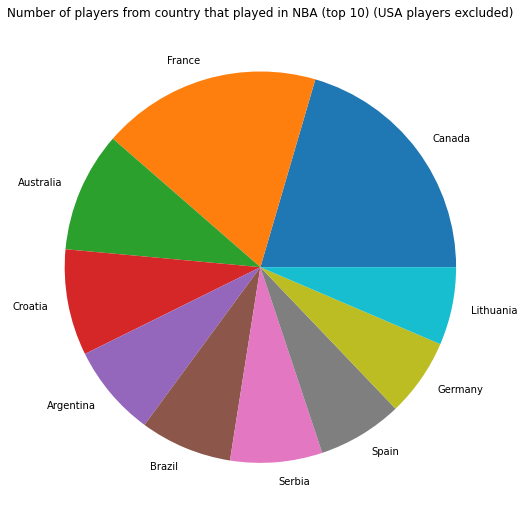

In [28]:
plt.rcParams["figure.figsize"] = [16,9]
plt.pie(country["player_name"][1:11], labels =country.index[1:11])
plt.title("Number of players from a country that played in the NBA (top 10) (USA players excluded)")
plt.show

Most players that were or are playing in the NBA are from Canada, France, Australia and Croatia.

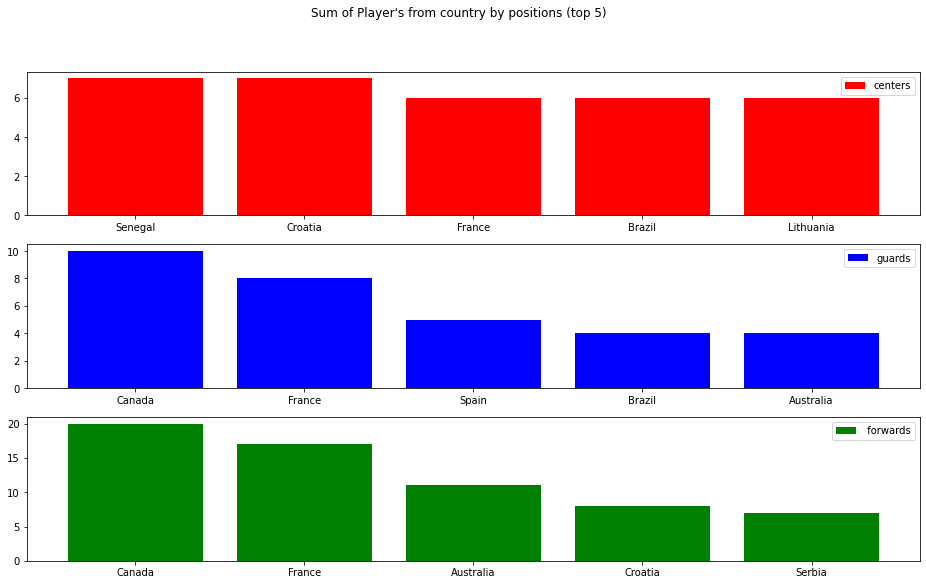

In [32]:
new_df = df[['player_name', 'country', "position"]]
new_df = new_df.drop_duplicates(subset=['player_name'])


x = new_df.groupby(new_df["country"]).count()
center= new_df.loc[new_df["position"] == "Center"]
center = center.groupby(new_df["country"])["player_name"].count()

guard= new_df.loc[new_df["position"] == "Guard"]
guard = guard.groupby(new_df["country"])["player_name"].count()

forward= new_df.loc[new_df["position"] == "Forward"]
forward = forward.groupby(new_df["country"])["player_name"].count()


n_df = pd.DataFrame()
n_df["center"] = center
n_df["guard"] = guard
n_df["forward"] = forward

n_df.fillna(0)

plt.rcParams["figure.figsize"] = [16,9]

n_df = n_df.sort_values(by ="center",ascending=False)
plt.subplot(3, 1, 1)
plt.bar(n_df.index[1:6], n_df["center"][1:6], label = "centers", color = "r")
plt.legend()

plt.subplot(3, 1, 2)
n_df = n_df.sort_values(by ="guard",ascending=False)
plt.bar(n_df.index[1:6], n_df["guard"][1:6], label = "guards", color = "b")
plt.legend()

plt.subplot(3, 1, 3)
n_df = n_df.sort_values(by ="forward",ascending=False)
plt.bar(n_df.index[1:6], n_df["forward"][1:6], label = " forwards", color = "g")
plt.legend()

plt.suptitle("Sum of Player's from country by positions (top 5)")
plt.show()

From the graph above, we can see that most centers (USA excluded) are from Senegal and Croatia. Canada and France are leading in guards and forward positions.

## Draft analysis

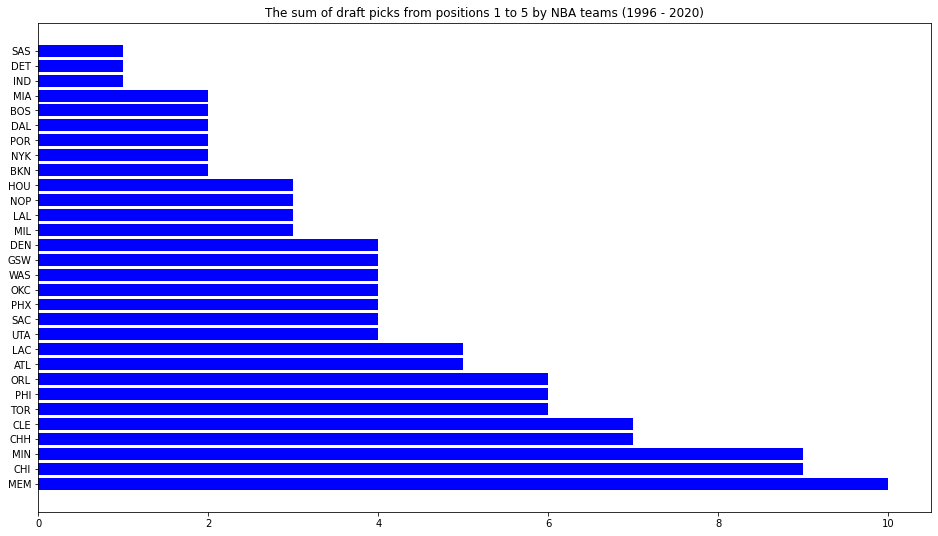

In [33]:
df_draft = df[["player_name","team_abbreviation","draft_year","draft_number","season"]]
df_draft = df_draft.drop_duplicates(subset=['player_name'])
df_draft.drop(df_draft[df_draft.draft_year == 0].index, inplace=True)
df_draft.drop(df_draft[df_draft.draft_number == 0].index, inplace=True)

novi = df_draft.loc[(df_draft['draft_number'] >= 1) & (df_draft['draft_number'] < 6) & (df_draft['draft_year'] > 1995)]
novi = novi.reset_index(drop=True)
df_1 = pd.DataFrame(novi.groupby(['team_abbreviation'])["draft_number"].count())
df_1 = df_1.sort_values(by ='draft_number', ascending=False)
plt.barh(df_1.index, df_1["draft_number"], label = "Count", color = "b")
plt.rcParams["figure.figsize"] = [16,9]
plt.title("The sum of draft picks from positions 1 to 5 by NBA teams (1996 - 2020)")
plt.show()

The Memphis Grizzlies lead the league with a whopping 10 top 5 picks in the span of 25 years, followed by the Minnesota Timberwolves and Chicago Bulls. 

## Conclusion

Players are getting younger and smaller, but they score more points, getting more rebounds and assists. 

Center improved the most so far.

The most players in the NBA are from USA. Canada, France, Australia and Croatia produced most players that played in the NBA (USA players excluded).

Memphis Grizzlies, Minnesota Timberwolves and Chicago Bulls in the last 25 years had the opportunity to choose the most among the top 5 picks in the draft.